<a href="https://colab.research.google.com/github/xhxuciedu/CS175/blob/master/feedforward_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Check GPU availability

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
device

device(type='cuda')

### Hypter-parameters 

In [0]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### Dataset

In [0]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### Check the data and labels

In [4]:
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


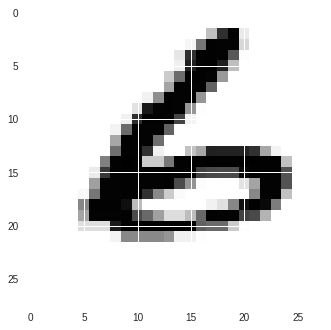

In [6]:
plt.imshow(images[1,0,:,:])

### Define the model

In [0]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

### Training

In [5]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4812
Epoch [1/5], Step [200/600], Loss: 0.2536
Epoch [1/5], Step [300/600], Loss: 0.3945
Epoch [1/5], Step [400/600], Loss: 0.1638
Epoch [1/5], Step [500/600], Loss: 0.1288
Epoch [1/5], Step [600/600], Loss: 0.1366
Epoch [2/5], Step [100/600], Loss: 0.1410
Epoch [2/5], Step [200/600], Loss: 0.1446
Epoch [2/5], Step [300/600], Loss: 0.1028
Epoch [2/5], Step [400/600], Loss: 0.1617
Epoch [2/5], Step [500/600], Loss: 0.0994
Epoch [2/5], Step [600/600], Loss: 0.0944
Epoch [3/5], Step [100/600], Loss: 0.0195
Epoch [3/5], Step [200/600], Loss: 0.1156
Epoch [3/5], Step [300/600], Loss: 0.0542
Epoch [3/5], Step [400/600], Loss: 0.0406
Epoch [3/5], Step [500/600], Loss: 0.0390
Epoch [3/5], Step [600/600], Loss: 0.0322
Epoch [4/5], Step [100/600], Loss: 0.0324
Epoch [4/5], Step [200/600], Loss: 0.0545
Epoch [4/5], Step [300/600], Loss: 0.0217
Epoch [4/5], Step [400/600], Loss: 0.0352
Epoch [4/5], Step [500/600], Loss: 0.0219
Epoch [4/5], Step [600/600], Loss:

### Testing

In [6]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.02 %


In [0]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')